# 22. 模型部分简介

## 22.1 简介

本书模型部分的重点在于数据探索，而不是假设验证或正式推断，但你还是可以学到几种基本工具，以帮助理解模型中的变化。

![title](img/22.1.png)

模型的作用是提供一个简单的、低维度的数据集摘要。理想情况下，模型可以捕获真正的“信号”（即由我们感兴趣的现象生成的模式），并忽略“噪声”（即我们不感兴趣的随机变动）。

>* 这里我们只介绍“预测”模型，顾名思义，也就是能够生成预测的模型。（监督式模型）
>
>* 本书中不打算讨论另一类模型，即“数据发现”模型。这种模型的目标不是进行预测，而是帮助我们发现数据中有趣的关系。（无监督式模型）

## 22.2 章节内容

本书不会使得你对模型背后的数学理论有更深刻的理解，但会帮助你建立对统计模型工作原理的直观认识，并且会向你介绍一整套有用的工具，以便帮助你使用模型来更深刻地理解数据。

* 第 23 章将介绍模型的运行机制，重点在于一些重要的线性模型。你将掌握一些通用工具，
以深刻理解预测模型如何对数据进行预测。我们将主要使用简单的模拟数据集进行介绍。


* 第 24 章将介绍如何使用模型从真实数据中提取已知模式。一旦识别出一种重要模式，那你就应该用一个模型将其明确表示出来，因为随后你就可以更容易地发现剩余的微妙信号。


* 第 25 章将介绍如何使用多个简单模型来帮助理解复杂数据集。这是一种非常强大的技术，但需要结合使用建模工具和编程工具才能掌握这种技术。

## 22.3 假设生成和假设验证

在本书中，我们将模型作为一种数据探索工具，这样就补全了第一部分中介绍过的 EDA(Exploratory Data Analysis，探索性数据分析)工具。通常来说，建模的重点在于推断或验证假设是否为真。正确地完成这些任务并不复杂，但相当困难。为了正确进行推断，你必须明确以下两点：


* 每个观测都可以用于数据探索，也可以用于假设验证，但不能同时在二者中使用。


* 在进行数据探索时，一个观测可以使用任意多次，但进行假设验证时，一个观测只能使用一次。一旦使用两次观测，假设验证就会变成数据探索。

这两点是非常必要的，因为***要想验证假设，你必须使用与生成假设的数据无关的数据***。在进行数据探索时，没有完全错误的结论，但永远不能将探索性分析与验证性分析混为一谈，因为这样做肯定会让你误入歧途。

如果想要严肃认真地进行验证性分析，一种方法是在进行分析前将数据分成 3 个部分。
* 将 60% 的数据作为训练集（training），或称探索集（or exploration）。你可以对这部分数据进行任意操作，比如可视化，或者用数据拟合多个模型。


* 将 20% 的数据作为查询集（query）。你可以使用这部分数据来比较模型或者进行手动可视化，但不能将其用于自动化过程。


*  20% 的数据留作测试集（test）。这部分数据只能使用一次，用于测试最终模型。

通过这种数据划分方法，你可以使用训练集数据进行探索，偶尔生成候选假设，并使用查询集数据进行验证。确信已经得到正确的模型后，你就可以使用测试集数据进行一次验证了。（注意，即使正在进行验证性建模，你还是需要做 EDA。如果不做任何 EDA，那么你就会对数据的质量问题一无所知。）

# 23. 建模基础

## 23.1 简介

建立模型的目的是提供一个简单的、低维度的数据集摘要。在本书中，我们使用模型的目的是将数据划分为模式（patterns）和残差（residuals）。本章使用模拟数据集，这些数据集非常简单、但可以帮助理解建模的本质，这样在下一章中就可以使用同样的技术来处理真实数据了。建模过程可以分为两个阶段：

（1）首先，你需要定义一个模型族来表示一种精确但一般性的模式，这种模式就是我们想要捕获的。例如，模式可以是一条直线或一条二次曲线。你可以用方程来表示模型族，比如 ：

* y = a_1 * x + a_2 

其中 x 和 y 是数据集中的已知变量，a_1和 a_2 是参数。我们可以通过改变参数来捕获不同的模式。

（2）接下来你要生成一个拟合模型，方法是从模型族中找出最接近数据的一个模型。这个阶段使得一般性的模型族具体化为特定模型，如：

* y = 3 * x + 7

拟合模型只是模型族中与数据最接近的一个模型，理解这一点非常重要。这意味着你找到了“最佳”模型（按照某些标准），但并不意味着你找到了良好的模型，而且也绝不代表这个模型是“真的”。

## 23.2  一个简单模型

研究模拟数据集sim1，它包含两个连续型变量x和y。

In [28]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.optimize import curve_fit
from plotnine import *

In [8]:
sim1 = pd.read_csv('sim1.csv')
sim1.head()

,x,y
0,1,4.199913
1,1,7.510634
2,1,2.125473
3,2,8.988857
4,2,10.243105


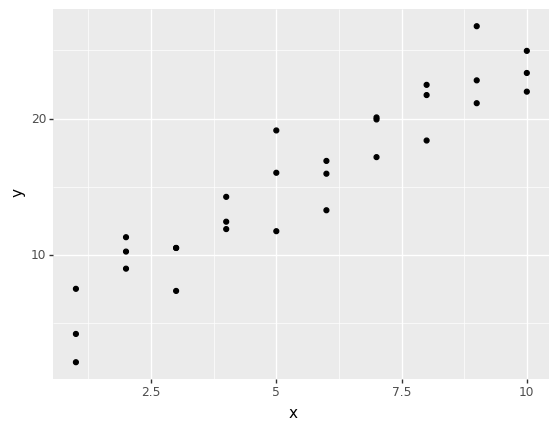

<ggplot: (-9223371872630541887)>

In [9]:
ggplot(sim1, aes('x', 'y')) +geom_point()

可以看到变量间存在一种非常强的线性关系。接下来我们使用模型来捕获这种模式，并将其明确表示出来。我们的任务是确定模型的基本形式。在以上示例中，变量间的关系应该是线性的，即
* y= a_0 + a_1 * x

In [18]:
# 生成250个随机模型
models = pd.DataFrame({'a1' : np.random.uniform(-20,40,250),
                       'a2' : np.random.uniform(-5,5,250)})
models.head()

,a1,a2
0,-7.141426,2.150904
1,19.513588,2.038168
2,26.194339,2.161218
3,-7.527737,-0.579288
4,11.853392,3.059956


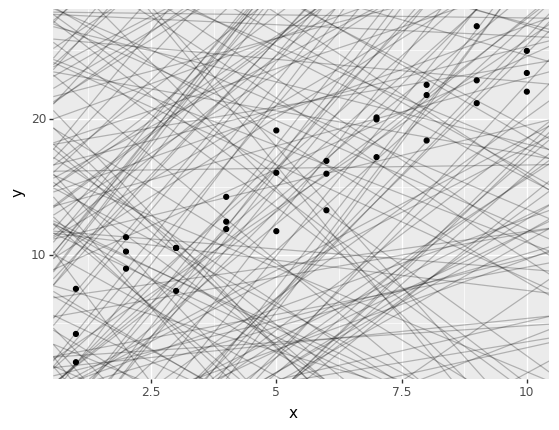

<ggplot: (-9223371872630536928)>

In [11]:
(ggplot(sim1, aes('x', 'y')) +
 geom_abline(
 aes(intercept = 'a1', slope = 'a2'),
 data = models, alpha = 1/4
 ) +
 geom_point())

这张图中有 250 个模型，但很多都是非常糟糕的！直觉告诉我们，良好的模型应该与数据非常“接近”，因此我们需要一种方法来量化数据与模型之间的距离。

其中一种简单的方法是找出每个数据点与模型之间的垂直距离。然后，找出使得模型与数据间的距离最近的 a_0 和 a_1 的值，就可以拟合出最优模型。

![title](img/23.1.png)
（图中x值稍稍移动了一下，以便能够看清每个距离。）

In [15]:
# 模型族函数，模型参数和数据作为输入，模型预测值作为输出
def model1(a,data):
    return a[0] + data.x*a[1]
model1([7,1.5],sim1).head()

0     8.5
1     8.5
2     8.5
3    10.0
4    10.0
Name: x, dtype: float64

In [16]:
# 距离转化为数值，采用均方根误差
def measure_distance(mod,data):
    diff = sim1.y-model1(mod,data)
    return np.sqrt(np.mean((diff)**2))
measure_distance([7, 1.5], sim1)

2.6652120688702854

In [19]:
# 计算定义的所有模型和数据间距离
def sim1_dist(a1,a2):
    return measure_distance([a1,a2],sim1)
models['dist'] = models.apply(lambda x: sim1_dist(x.a1,x.a2),axis=1)
models

,a1,a2,dist
0,-7.141426,2.150904,11.026791
1,19.513588,2.038168,15.367381
2,26.194339,2.161218,22.679057
3,-7.527737,-0.579288,27.368169
4,11.853392,3.059956,13.660233
...,...,...,...
245,36.410818,2.667050,35.682762
246,-19.981276,0.371845,33.853573
247,28.405667,-0.765967,12.062829
248,-16.712382,0.470594,30.049781


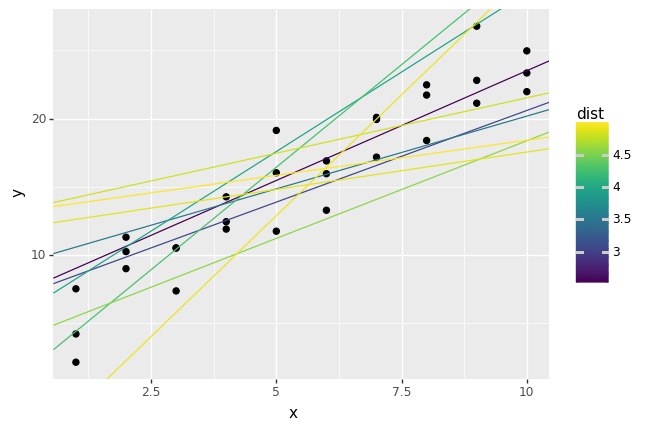

<ggplot: (-9223371872630018858)>

In [20]:
# 将最好的 10 个模型覆盖到数据上，使用'dist'变量值为模型的上色
(ggplot(sim1,aes('x','y'))+
 geom_point(size = 2)+
 geom_abline(
     aes(intercept = 'a1', slope = 'a2', color = 'dist'),
     data = models.sort_values(by='dist').head(10)))

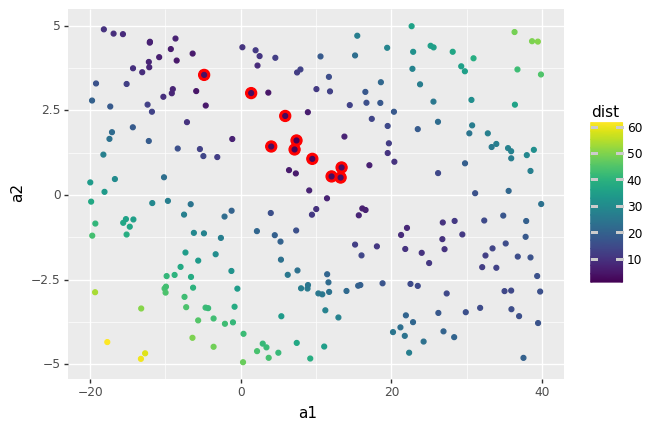

<ggplot: (164224812857)>

In [22]:
# 还可以将这些模型看作观测，并使用由 a1 和 a2 组成的一张散点图来表示它们，还是使用 -dist 进行上色
(ggplot(models,aes('a1','a2'))+
    geom_point(
        data = models.sort_values(by='dist').head(10),
        size = 4, color = 'red')+
    geom_point(aes(color = 'dist')))

相较于检查多个随机模型，我们还可使用一种更加系统化的方法来找出模型参数（这种方法称为网格搜索法,grid search）。我们生成一张分布均匀的数据点网格，然后将这个网格与前面图中的 10 个最佳模型绘制在一张图中，凭借最佳模型在网格中的位置就可以找出模型参数的粗略值：

In [25]:
# 生成均匀分布数据点网格
# np.linspace(start,stop,num)
# np.repeat [1,2,3] to [1,1,2,2,3,3]
# np.tile [1,2,3] to [1,2,3,1,2,3]
grid = pd.DataFrame({'a1':np.tile(np.linspace(-5,20,25),25),
                    'a2':np.repeat(np.linspace(1,3,25),25)})
grid['dist'] = grid.apply(lambda x: sim1_dist(x.a1,x.a2),axis=1)
grid

,a1,a2,dist
0,-5.000000,1.0,15.452475
1,-3.958333,1.0,14.443171
2,-2.916667,1.0,13.438807
3,-1.875000,1.0,12.440580
4,-0.833333,1.0,11.450094
...,...,...,...
620,15.833333,3.0,17.180474
621,16.875000,3.0,18.202042
622,17.916667,3.0,19.225767
623,18.958333,3.0,20.251322


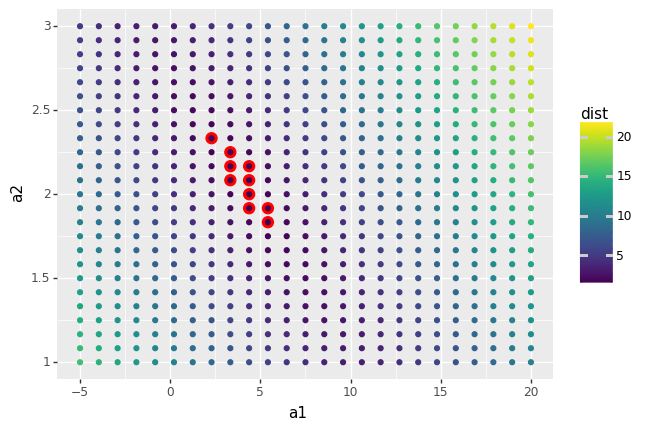

<ggplot: (164224846747)>

In [26]:
(ggplot(grid,aes('a1','a2'))+
    geom_point(
        data = grid.sort_values(by='dist').head(10),
        size = 4, color = 'red')+
    geom_point(aes(color = 'dist')))

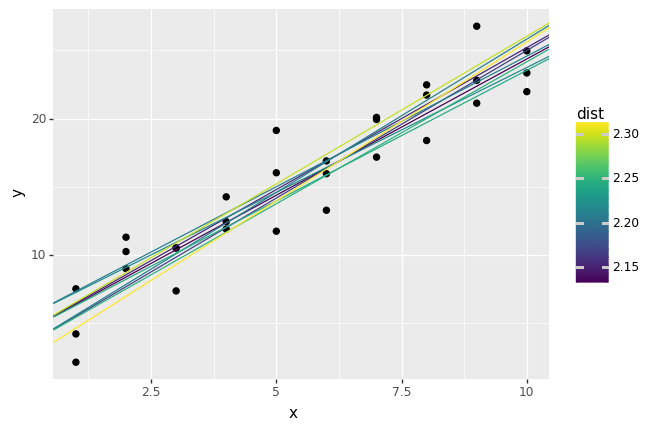

<ggplot: (-9223371872629874635)>

In [27]:
# 将这 10 个最佳模型重新覆盖到原始数据上观察效果
(ggplot(sim1, aes('x', 'y')) +
 geom_point(size = 2) +
 geom_abline(
 aes(intercept = 'a1', slope = 'a2', color = 'dist'),
 data = grid.sort_values(by='dist').head(10)
 ))

教材中提到，可以设想不断细化网格来最终找出最佳模型。但还有一个更好的方法可以解决这个问题，这种方法是名为“牛顿—拉夫逊搜索”的数值最小化工具。

牛顿—拉夫逊方法的直观解释非常简单：先选择一个起点，环顾四周找到最陡的斜坡，并沿着这个斜坡向下滑行一小段，然后不断重复这个过程，直到不能再下滑为止。在 R 中可以使用 optim() 函数来完成这个任务。

“无须过多担心 optim() 函数的工作细节。现在重要的是要建立直觉”。如果具有定义模型与数据集间距离的函数，以及可以通过修改模型参数使距离最小化的算法，那么我们就可以找出最佳模型。以上这种方法的好处是，只要能够写出方程来表示模型族，那么你就可以使用这种方法。

Python中，可以调用Scipy.optimize包中的curve_fit()来完成最优化任务。

In [30]:
# from scipy.optimize import curve_fit
#返回popt与pcov两个参数：
#popt是一个一维数组，表示得到的拟合方程的参数。
#pcov是一个二维数组，是在popt参数下得到的协方差。
def model2(x,a,b):
    return a + b * x
best = curve_fit(model2, sim1.x, sim1.y)[0]
best

array([4.2208219 , 2.05153308])

教材中提到对于这个模型，我们还可以使用另一种方法，因为它是一个更广泛模型族，线性模型的一种特殊情况。因此可以使用R中专门拟合线性模型的工具lm()。

“lm() 使用了一种非常复杂的算法，通过几何学、微积分和线性代数间的一些关系，它只需要一个步骤就可以找出最近似的模型。这种方法的速度非常快，而且一定能找到全局最小值。”

Python中，处理线性模型最常用的是statsmodels.formula.api 或 statsmodels.api中的ols以及其延伸wls，gls等。

## 23.3  模型可视化

上一节中的模型，我们可以通过仔细检查模型族和拟合系数来找出模型捕获的模式。但这里我们准备介绍另外一种方法，即重点通过预测来理解模型。

找出模型未捕获的信息也是非常有用的，即所谓的残差，它是数据去除预测值后剩余的部分。残差是非常强大的，因为它允许我们使用模型去除数据中显著的模式，以便对剩余的微妙趋势进行研究。

### 23.3.1  预测

In [38]:
mod1 = smf.ols('y~x',sim1).fit()
grid = pd.DataFrame({'x' : sim1.x.unique()})
grid['pred'] = mod1.predict(grid.x)
grid.head()

,x,pred
0,1,6.272355
1,2,8.323888
2,3,10.375421
3,4,12.426954
4,5,14.478487


下一步是连接预测点绘制预测值。之所以要做这些额外的工作，而不是直接使用geom_abline() 函数传入截距和斜率，因为这种方法适合所有模型，不管是最简单的还是最复杂的，它只受可视化能力的限制。

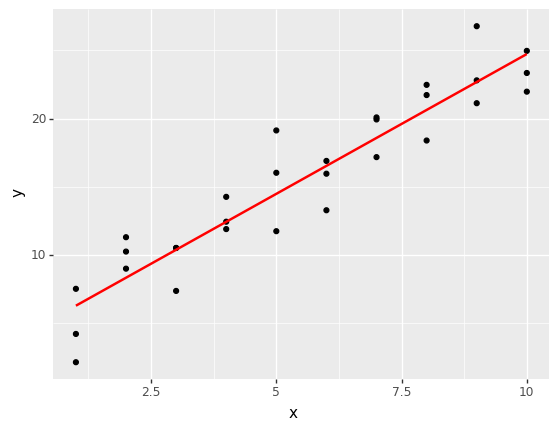

<ggplot: (-9223371872629883946)>

In [40]:
(ggplot(sim1, aes('x')) +
 geom_point(aes(y = 'y')) +
 geom_line(
 aes(y = 'pred'),
 data = grid,
 colour = "red",
 size = 1
 ))

### 23.3.2  残差

与预测值相对的是残差。预测值可以告诉我们模型捕获的模式，残差则表示模型漏掉的部分。（残差就是我们前面计算过的观测值与预测值间的距离）。

In [48]:
sim1['resid'] = mod1.resid
sim1.head()

,x,y,resid
0,1,4.199913,-2.072442
1,1,7.510634,1.238279
2,1,2.125473,-4.146882
3,2,8.988857,0.664969
4,2,10.243105,1.919217


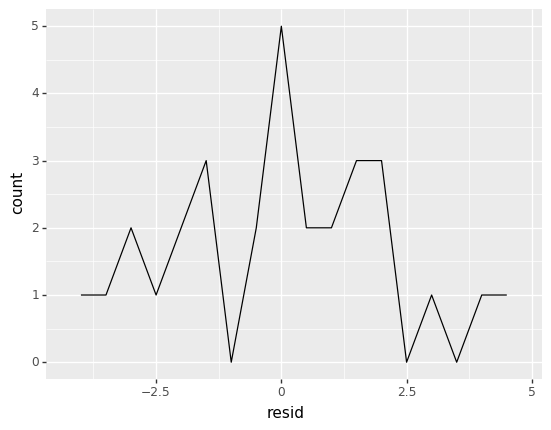

<ggplot: (164227010231)>

In [50]:
# 绘制频率多边形图，理解残差的分布
(ggplot(sim1, aes('resid')) +
 geom_freqpoly(binwidth = 0.5))
# 残差的均值应为0

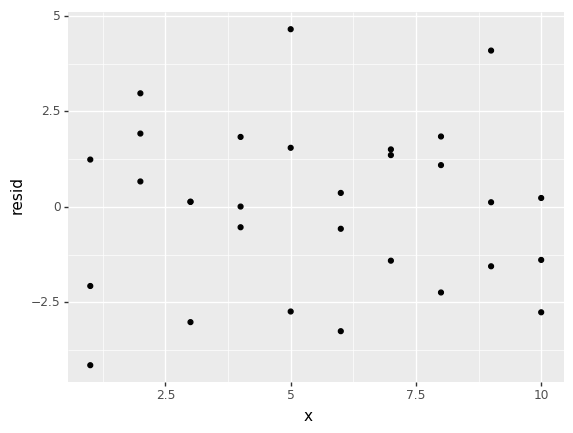

<ggplot: (-9223371872628508335)>

In [56]:
# 残差代替原来的预测变量来重新绘图
(ggplot(sim1, aes('x', 'resid')) +
 geom_point())

由上图可知，残差应该是随机的噪声，这表明我们的模型非常好地捕获了数据集中的模式。

## 23.4 公式和模型族

### 23.4.1 分类变量

假设存在公式 y ~ sex，其中 sex 的值要么是男性要么是女性，那么将其转换成 y = x_0 + x_1 * sex 就没有意义了，因为 sex 不是数值，我们不能对它使用乘法。相反，R 的做法是将其转换为 y = x_0 + x_1 * sex_male，如果 sex 为男性，那么 sex_male 的值就是 1，否则其值就是 0：

In [60]:
sim2 = pd.read_csv('sim2.csv')
sim2.head()

,x,y
0,a,1.935363
1,a,1.176489
2,a,1.243685
3,a,2.623549
4,a,1.112038


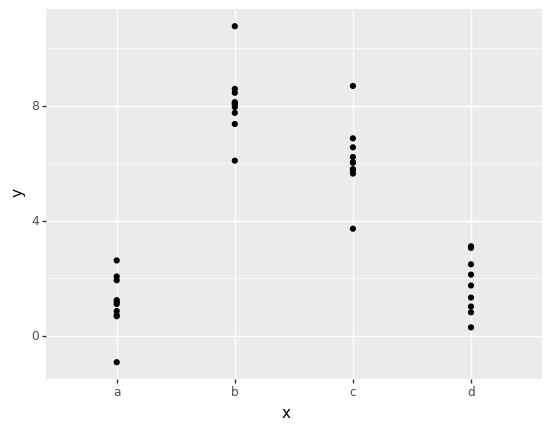

<ggplot: (-9223371872628508384)>

In [61]:
# sim2数据集图示
(ggplot(sim2) +
 geom_point(aes('x', 'y')))

In [62]:
# 拟合一个模型并生成预测
mod2 = smf.ols('y~x',sim2).fit()
grid = pd.DataFrame({'x':sim2.x.unique()})
grid['pred'] = mod2.predict(grid['x'])
grid

,x,pred
0,a,1.152166
1,b,8.116039
2,c,6.127191
3,d,1.910981


实际上，带有分类变量 x 的模型会为每个分类预测出均值。（因为均值会使均方根距离最小化。）如果将预测值覆盖到原始数据上，就很容易看出这一点：

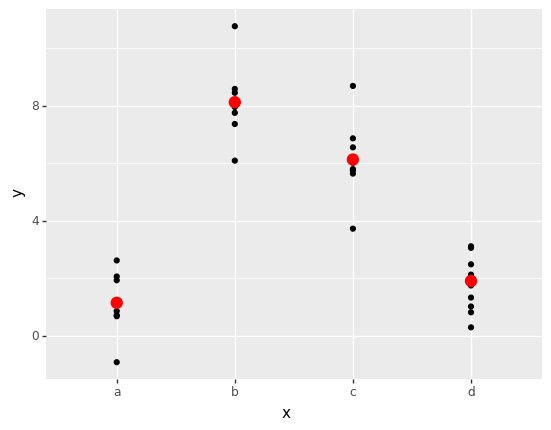

<ggplot: (164226060601)>

In [64]:
#写data = grid会报位置参数错误
(ggplot(sim2) +
 geom_point(aes('x','y')) +
 geom_point(grid, aes('x','pred'),size = 4, color = 'red')
)

### 23.4.2 交互项（连续变量与分类变量）

In [65]:
sim3 = pd.read_csv('sim3.csv')
sim3.head()

,x1,x2,rep,y,sd
0,1,a,1,-0.570736,2
1,1,a,2,1.184150,2
2,1,a,3,2.237320,2
3,1,b,1,7.436696,2
4,1,b,2,8.518293,2


sim3数据集中包含了一个分类预测变量和一个连续预测变量，我们可以使用一张简单的图来表示它们：

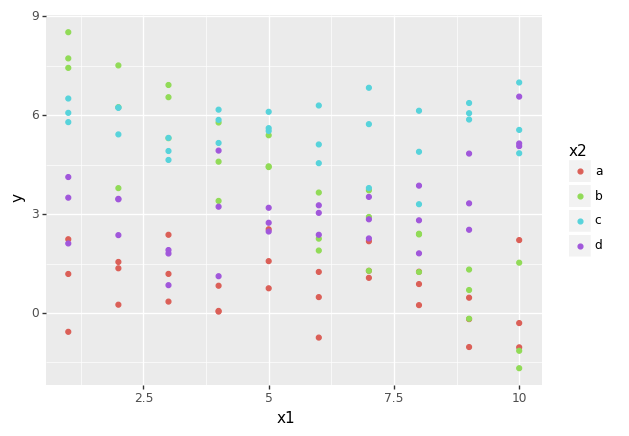

<ggplot: (-9223371872630028221)>

In [67]:
(ggplot(sim3, aes('x1', 'y')) +
 geom_point(aes(color = 'x2')))

In [68]:
#可以使用两种模型来拟合这份数据：
mod1 = smf.ols('y~x1 + x2',sim3).fit()
mod2 = smf.ols('y~x1 * x2',sim3).fit()

如果使用 + 添加变量，那么模型会独立地估计每个变量的效果，不考虑其他变量。如果使用*，那么拟合的就是所谓的交互项。

例如，y ~ x1 * x2 会转换为 y = a_0 + a_1 * x1 + a_2 *x2 + a_12 * x1 * x2。注意只要使用了 *，交互项及其各个组成部分就都会包括在模型中。

In [71]:
# 生成模型网格
grid = pd.DataFrame({'x1':np.repeat(sim3.x1.unique(),4),
                     'x2':np.tile(sim3.x2.unique(),10)})
# 加入两个模型的预测值
grid['mod1'] = mod1.predict(grid[['x1','x2']])
grid['mod2'] = mod2.predict(grid[['x1','x2']])
grid.head()

,x1,x2,mod1,mod2
0,1,a,1.674928,1.208218
1,1,b,4.562739,7.517313
2,1,c,6.480664,5.707266
3,1,d,4.034515,2.320049
4,2,a,1.478190,1.115194


In [72]:
# 对grid进行数据整理(tidy章节内容)，生成模型类型列和预测值列
grid = grid.melt(id_vars=['x1','x2'], var_name='model',value_name='pred')
grid.head()

,x1,x2,model,pred
0,1,a,mod1,1.674928
1,1,b,mod1,4.562739
2,1,c,mod1,6.480664
3,1,d,mod1,4.034515
4,2,a,mod1,1.478190


In [ ]:
# 用分面进行两个模型的可视化

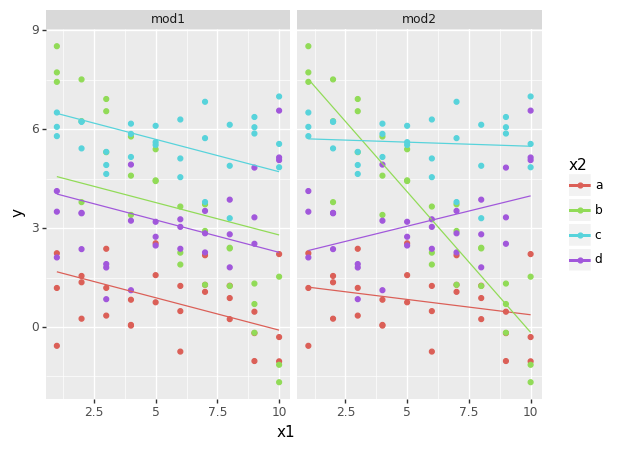

<ggplot: (-9223371872630028270)>

In [73]:
(ggplot(sim3,aes('x1', 'y', color = 'x2')) +
 geom_point()+
 geom_line(grid, aes(y = 'pred'))+
 facet_wrap('~ model')
)

在使用 + 的模型中，每条直线都具有同样的斜率，但截距不同。在使用 * 的模型中，每条直线的斜率和截距都不相同。交互项模型中，不同x2的取值改变了x1取值对预测值的影响，体现了变量间交互作用。

对于这份数据来说，哪种模型更好呢？ 我们可以检查一下残差。

In [74]:
# 添加和整理残差
sim3_resid = pd.concat([sim3, mod1.resid , mod2.resid],axis=1).rename(columns={0:'mod1',1:'mod2'})
sim3_resid = sim3_resid.melt(id_vars=['x1','x2','rep','y','sd'], var_name='model',value_name='resid')
sim3_resid.head()

,x1,x2,rep,y,sd,model,resid
0,1,a,1,-0.570736,2,mod1,-2.245664
1,1,a,2,1.184150,2,mod1,-0.490778
2,1,a,3,2.237320,2,mod1,0.562392
3,1,b,1,7.436696,2,mod1,2.873957
4,1,b,2,8.518293,2,mod1,3.955554


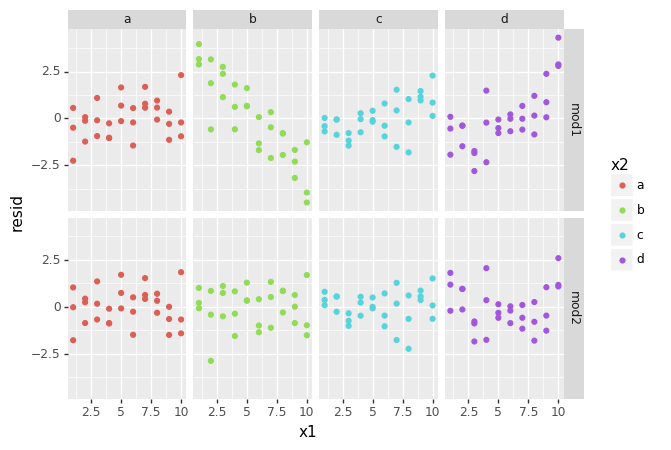

<ggplot: (164226271629)>

In [75]:
# 使用模型和x2变量进行分面
(ggplot(sim3_resid, aes('x1', 'resid', color = 'x2')) +
 geom_point() +
 facet_grid('model ~ x2'))

mod2 的残差中几乎看不到明显的模式。mod1 的残差则表明这个模型在 b 分类中明显漏掉了某种模式，而在 c 和 d 分类中，虽然不明显，但还是存在某种模式的。

“你应该很想知道，是否有精确的方法可以确定 mod1 还是 mod2 更好。确实有这种方法，但需要强大的数学背景，而且我们现在还不用关心这个问题。现在我们应该关心的是定性评估模型能否捕获我们感兴趣的模式的方法。”


### 23.4.3 交互项（两个连续变量）

以下模型和上一节中的基本相同，只是包括了两个连续变量。前几个步骤几乎和前面的示例完全一样：

In [76]:
# 读取数据集
sim4 = pd.read_csv('sim4.csv')
# 拟合模型
mod1 = smf.ols('y~x1 + x2',sim4).fit()
mod2 = smf.ols('y~x1 * x2',sim4).fit()
# 生成网格
grid = pd.DataFrame({'x1':np.repeat(np.linspace(sim4.x1.min(),sim4.x1.max(),5),5),
                     'x2':np.tile(np.linspace(sim4.x2.min(),sim4.x2.max(),5),5)})
# 网格中生成预测值
grid['mod1'] = mod1.predict(grid[['x1','x2']])
grid['mod2'] = mod2.predict(grid[['x1','x2']])
# tidy数据集不同模型预测
grid = grid.melt(id_vars=['x1','x2'], var_name='model',value_name='pred')
grid.head()
# sim4.x1.unique()

,x1,x2,model,pred
0,-1.0,-1.0,mod1,0.996309
1,-1.0,-0.5,mod1,-0.394948
2,-1.0,0.0,mod1,-1.786206
3,-1.0,0.5,mod1,-3.177464
4,-1.0,1.0,mod1,-4.568722


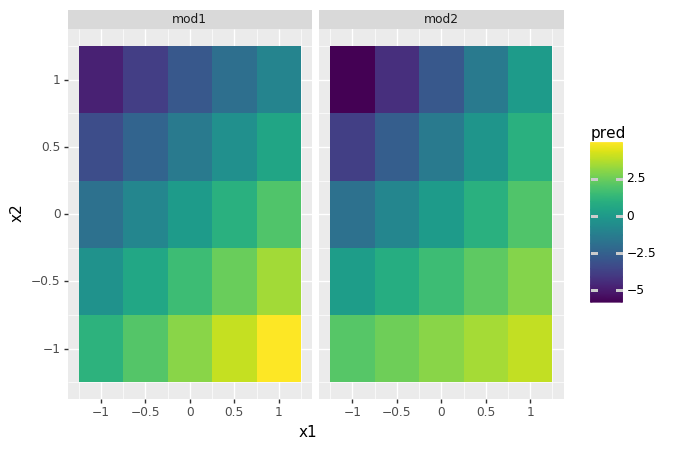

<ggplot: (-9223371872628395944)>

In [77]:
# 可视化，由于有两个连续型预测变量，我们可以将模型想象为一个三维表面
(ggplot(grid, aes('x1', 'x2')) +
 geom_tile(aes(fill = 'pred')) +
 facet_wrap('~ model'))

观察这两张图，我们看不出这两个模型有什么明显区别。但这是一种错觉，因为我们的眼睛和大脑不擅长精确分辨颜色的深浅。我们不能从上面查看这个表面，而应该分别从 x1和 x2 的角度来查看，并表示出多个切面：

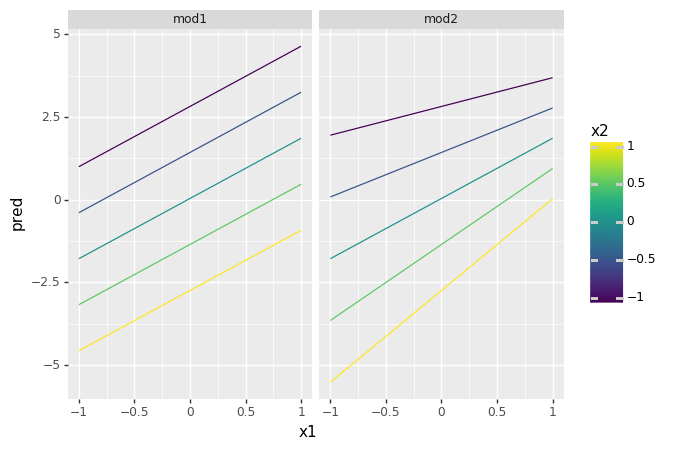

<ggplot: (-9223371872628068678)>

In [78]:
(ggplot(grid, aes('x1', 'pred', color = 'x2', group = 'x2')) +
 geom_line() +
 facet_wrap('~ model'))

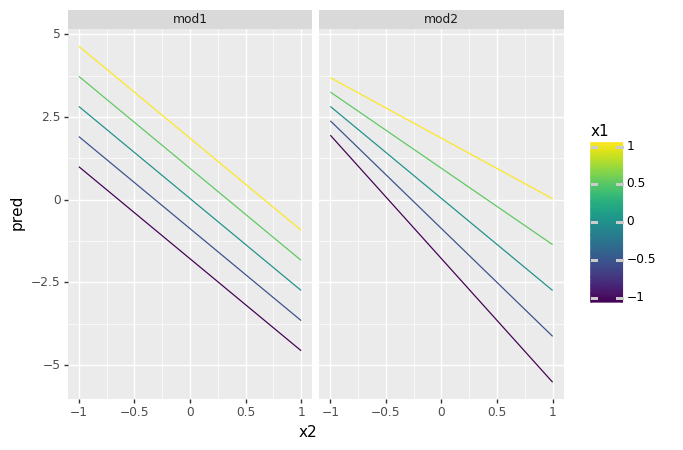

<ggplot: (164226731240)>

In [79]:
(ggplot(grid, aes('x2', 'pred', color = 'x1', group = 'x1')) +
 geom_line() +
 facet_wrap('~ model'))

这说明两个连续型变量的交互项的作用方式与一个分类变量和一个连续变量的交互项基本相同。交互项说明了两个变量是相互影响的，如果要预测 y 值，那么必须同时考虑 x1 的值和 x2 的值。

“对于 3 个或更多变量同时进行的交互作用，我们更不能指望可以轻松理解了。但再次让人聊以自慰的是，我们现在只是使用模型进行数据探索，以后还可以逐步完善这个模型。现在的模型不一定要很完美，只要能帮助我们更好地认识数据即可。”

### 23.4.4 变量转换

R 中的绝大多数建模函数都使用一种标准转换将公式转换为表示模型族的方程。我们已经见过了一个简单的转换:

y ~ x 转换为 y = a_1 + a_2 * x

更多用法：
* 丢弃截距项：y ~ x - 1

* 添加多个变量 y ~ x1 + x2

* 添加x1,x2及其交互项 y ~ x1 * x2

* 添加高次项或对值进行运算 log(y) ~ sqrt(x1) + x2

这种公式表示法有时也称为“Wilkinson-Rogers 表示法”。Python statmodel.formula.api中函数也采用这一公式表示法，具体可查询帮助文档。

https://www.statsmodels.org/dev/example_formulas.html

***近似非线性函数例子***：

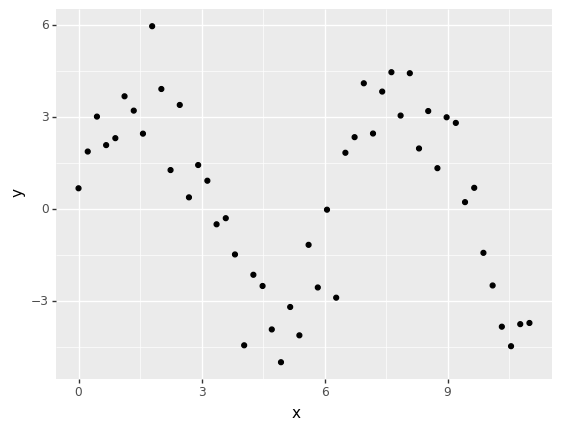

<ggplot: (164224915127)>

In [94]:
x = np.linspace(0,3.5*np.pi,50)
sim5 = pd.DataFrame({'x':x,'y': 4*np.sin(x)+np.random.randn(len(x))})
sim5.head()

(ggplot(sim5, aes('x', 'y')) +
 geom_point())

R中调用splines库，采用自然样条法 splines::ns()进行拟合。

Python中我们采用Scipy.interpolate中的UnivariateSpline方法，来对单变量噪声数据进行插值拟合尝试。

In [95]:
from scipy.interpolate import UnivariateSpline
# 插值，参数s为smoothing factor
for i in range(1,6):
    func_i = UnivariateSpline(sim5.x, sim5.y, s = i*20)
    sim5['mod'+str(i)] = func_i(sim5.x)
sim5 = sim5.melt(id_vars=['x','y'], var_name='model',value_name='pred')
sim5

,x,y,model,pred
0,0.000000,0.678471,mod1,0.735235
1,0.224399,1.875673,mod1,1.870297
2,0.448799,3.013808,mod1,2.495056
3,0.673198,2.084695,mod1,2.746494
4,0.897598,2.311025,mod1,2.761594
...,...,...,...,...
245,10.097976,-2.487547,mod5,-1.179212
246,10.322376,-3.830394,mod5,-2.291098
247,10.546775,-4.466094,mod5,-3.495594
248,10.771175,-3.747519,mod5,-4.784058


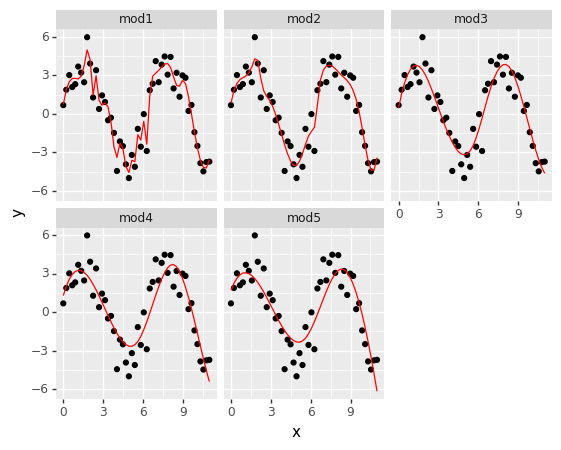

<ggplot: (-9223371872628701780)>

In [96]:
(ggplot(sim5, aes('x', 'y')) +
 geom_point() +
 geom_line(aes(y = 'pred'), color = "red")+
 facet_wrap('~ model'))

数据探索阶段的模型建立及其可视化，是为了直观地观察数据，以期发现数据中的规律，再进一步用严谨的计量去验证。此例中通过不同平滑度的插值函数拟合画图，以期发现数据的规律。而拟合函数本身的解析式和精度并不重要，即使看上去拟合很好，也只是一种可能的函数选择，而不能直接略过后面求解和验证的过程而直接把其作为数据的模式。

因此不用纠结于此例中非线性拟合的模型解析式，与统计指标等。